# Implementasi PCA pada beberapa metode

### Principal Component Analysis

Principal Component Analysis digunakan untuk menyederhanakan suatu data, dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum. 
Metode PCA bertujuan untuk menyederhanakan variabel yang diamati dengan cara mereduksi dimensinya. Hal ini dilakukan dengan cara menghilangkan korelasi diantara variabel bebas melalui transformasi variabel bebas asal ke variabel baru yang tidak berkorelasi sama sekali.

Berikut merupakan langkah-langkah penerapan PCA menggunakan sklearn pada dataset iris

### Import Library

In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset iris menggunakan dataframe pandas

In [490]:
df=pd.read_csv('https://raw.githubusercontent.com/dsty13/dataset/main/IrisDataset.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [491]:
df['species'].value_counts() 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

code diatas digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dalam sebuah DataFrame yang disimpan dalam variabel 'df'.

In [492]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

mengembalikan daftar kolom yang ada dalam DataFrame yang disimpan dalam variabel 'df'.

In [493]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

memisahkan data dalam DataFrame 'df' menjadi dua bagian, dengan kolom 0 hingga 3 (indeks 0, 1, 2, dan 3) disimpan dalam variabel 'X' dan kolom 4 disimpan dalam variabel 'y'.

### Membuat gambar histogram dari empat fitur dalam DataFrame 'X'

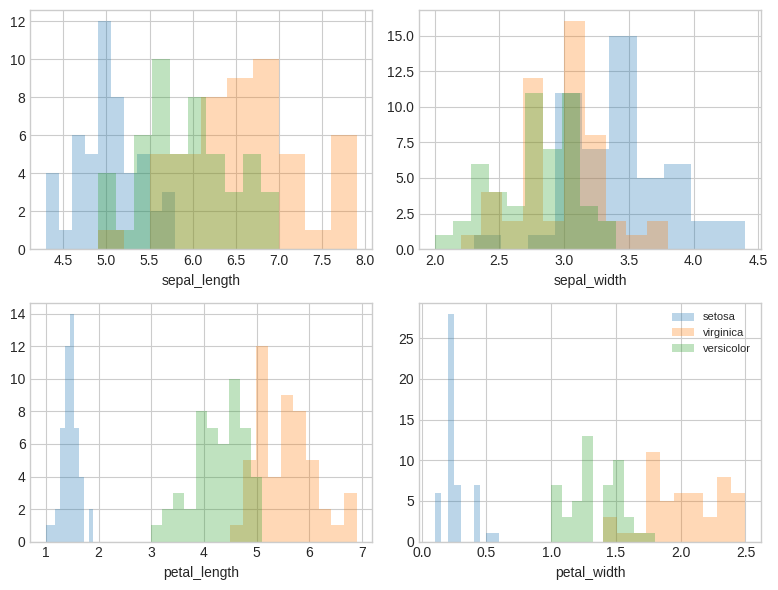

In [494]:
label_dict={1: 'setosa',
           2: 'virginica',
           3: 'versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','virginica','versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

### Penskalaan standar pada data menggunakan library scikit-learn

In [495]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

Melakukan normalisasi data menggunakan StandardScaler dan kemudian menghitung matriks kovarian dari data yang telah dinormalisasi. Hasilnya dicetak sebagai "Covariance Matrix" diikuti oleh nilai matriks kovarian.

### Menghitung dan mencetak matriks kovarian dari data yang telah distandardisasi.

In [496]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [497]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Menghitung eigenvector dan eigenvalue dari matriks kovarian.

In [498]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


### Menghitung matriks korelasi, eigenvector, dan eigenvalue.

In [499]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [500]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [501]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

menggunakan Singular Value Decomposition (SVD) pada transpose matriks X_std dan hasilnya disimpan dalam variabel u.

### Memverifikasi norma eigenvector dan mencetak pesan jika valid.

In [502]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everything is ok")

Everything is ok


In [503]:
# Membuat daftar pasangan (nilai eigen, vektor eigen)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Mengurutkan pasangan (nilai eigen, vektor eigen) dari tinggi ke rendah.
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Konfirmasi visual bahwa daftar tersebut diurutkan dengan benar berdasarkan eigenvalue yang menurun.
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


### Menghitung persentase variasi dan kumulatif menggunakan eigenvalues terurut.

In [504]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

### Membuat gambar persentase variasi dan variasi kumulatif yang dijelaskan.

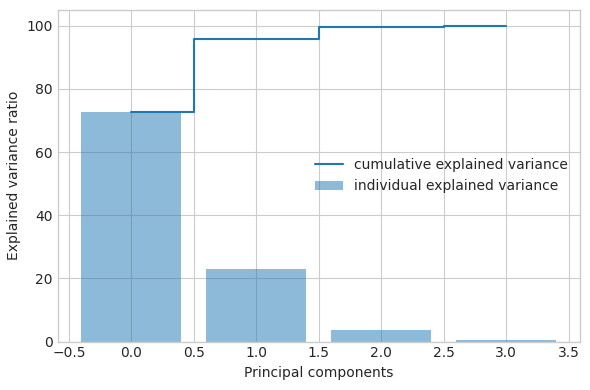

In [505]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [506]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


Menggabungkan dua vektor eigen terpilih menjadi sebuah matriks

In [507]:
Y = X_std.dot(matrix_w)

mengalikan matriks X_std dengan matriks W dan menyimpan hasilnya dalam matriks Y.

### Mengubah data 'X_std' menjadi matriks 'Y_sklearn' berdimensi dua.

In [508]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

### Membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label.


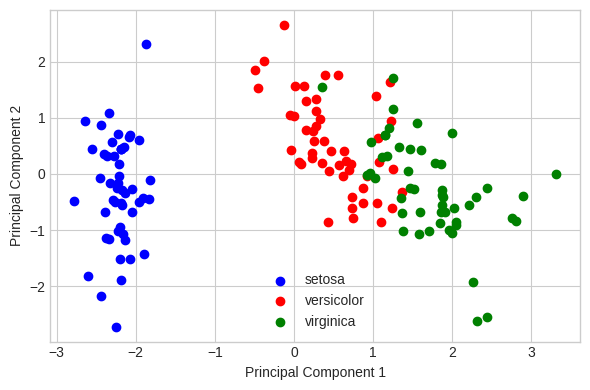

In [509]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### Menampilkan Hasil dari PCA

In [510]:
PCA_hasil=pd.DataFrame(Y_sklearn)
PCA_hasil.columns=['PC1','PC2']
PCA_hasil

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [511]:
PCA_hasil['species']=df['species']
PCA_hasil

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [512]:
df = PCA_hasil
df

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


# Metode Decision Tree

In [513]:
df = PCA_hasil
df

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [514]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [515]:
df.isnull().sum()

PC1        0
PC2        0
species    0
dtype: int64

In [516]:
X = df.drop(['species'], axis=1)
y = df['species']

### Splitting Data

In [517]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [518]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [519]:
X_train.dtypes

PC1    float64
PC2    float64
dtype: object

### Import Modul DecisionTreeClassifier

Decision Tree Classifier adalah algoritma pembelajaran mesin yang digunakan untuk membangun model klasifikasi berdasarkan aturan keputusan berhirarki yang dihasilkan dari fitur-fitur data.

In [520]:
from sklearn.tree import DecisionTreeClassifier

Membuat objek Decision Tree Classifier menggunakan indeks Gini

In [521]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Melakukan Prediksi Pada data uji

In [522]:
y_pred_gini = clf_gini.predict(X_test)

### Menghitung Akurasi model menggunakan kriteria indeks Gini pada data uji

In [523]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.90


### Melakukan Prediksi pada data latih

In [524]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 

### Menghitung skor model pada data latih dan data uji

In [525]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.90


### Membuat Visualisasi Decision Tree

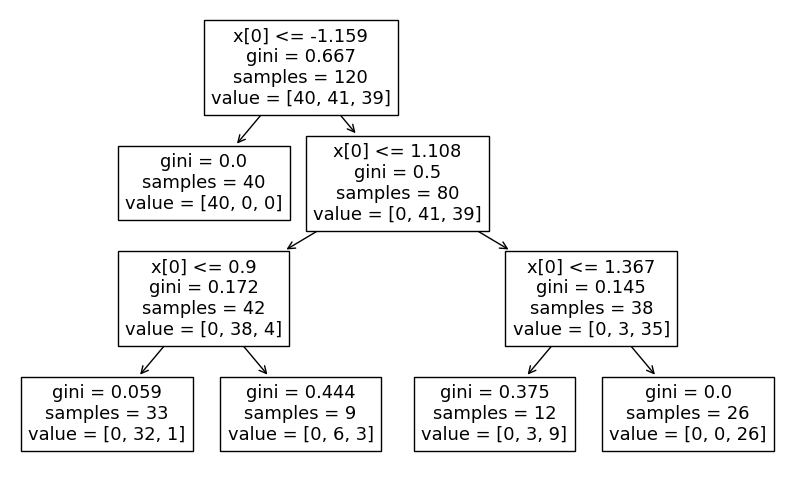

In [526]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

# Metode KNN

### Splitting Data

In [527]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Import Modul KNeighborsClassifier

KNeighborsClassifier adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi berdasarkan k-nearest neighbors (k tetangga terdekat).

In [528]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Melakukan Prediksi

In [529]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### Menghitung Akurasi dan menampilkan Confusion Matrix

In [530]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9333333333333333


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

### Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [531]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,virginica
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


# Metode Naive Bayes

### Splitting Data

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Import modul GaussianNB

GaussianNB adalah implementasi dari algoritma Naive Bayes dengan asumsi bahwa fitur-fitur yang independen diambil dari distribusi Gaussian.

In [533]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Melakukan Prediksi

In [534]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

### Menghitung Akurasi dan menampilkan Confusion Matrix

In [535]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

### Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [536]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,virginica
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


# Metode ANN

In [537]:
df = PCA_hasil
df

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


### Import Modul MLPClassifier

MLPClassifier adalah sebuah model Artificial Neural Network (ANN) dengan multi-layer perceptron yang digunakan untuk klasifikasi.

In [538]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [539]:
X = df.drop(['species'], axis=1)
y = df['species']

### Splitting Data

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

### Konfigurasi Pada Modul MLPClassifier

In [541]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

### Melatih Model MLPClassifier

Melatih model MLPClassifier menggunakan data latih X_train dan label latih y_train. Model akan belajar untuk melakukan klasifikasi menggunakan metode backpropagation. Kemudian melakukan prediksi pada data uji dan hasilnya disimpan dalam variabel y_pred.

In [542]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Iteration 1, loss = 1.12043510
Iteration 2, loss = 1.11893388
Iteration 3, loss = 1.11679766
Iteration 4, loss = 1.11409991
Iteration 5, loss = 1.11089719
Iteration 6, loss = 1.10725151
Iteration 7, loss = 1.10321397
Iteration 8, loss = 1.09883021
Iteration 9, loss = 1.09415513
Iteration 10, loss = 1.08921388
Iteration 11, loss = 1.08404615
Iteration 12, loss = 1.07868737
Iteration 13, loss = 1.07316665
Iteration 14, loss = 1.06752089
Iteration 15, loss = 1.06176588
Iteration 16, loss = 1.05592988
Iteration 17, loss = 1.05003301
Iteration 18, loss = 1.04408572
Iteration 19, loss = 1.03811821
Iteration 20, loss = 1.03213705
Iteration 21, loss = 1.02614994
Iteration 22, loss = 1.02015805
Iteration 23, loss = 1.01417278
Iteration 24, loss = 1.00820227
Iteration 25, loss = 1.00224857
Iteration 26, loss = 0.99633703
Iteration 27, loss = 0.99045675
Iteration 28, loss = 0.98461243
Iteration 29, loss = 0.97881336
Iteration 30, loss = 0.97305087
Iteration 31, loss = 0.96732860
Iteration 32, los

### Menghitung Akurasi Model

Menghitung akurasi model dengan membandingkan label sebenarnya y_test dengan label yang diprediksi y_pred menggunakan fungsi accuracy_score. Nilai akurasi akan dihasilkan sebagai output.

In [543]:
accuracy_score(y_test, y_pred)

0.9333333333333333

### Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [544]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,virginica
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


# Kesimpulan 

Dari beberapa metode yang digunakan yaitu Decision Tree, KNN , Naive Bayes dan ANN untuk klasifikasi menggunakan dataset iris yang berjumlah 150 data dengan jumlah label sebanyak 3 kelas dimana masing-masing kelas terdapat 50 data dengan jumlah 4 fitur . Kemudian dilakukan proses PCA yang awalnya memiliki 4 fitur menjadi memiliki 2 fitur. setelah itu dilakukan pembagian data 80:20 yaitu data training sebanyak 80% dan data latih sebanyak 20%. 

Maka, didapatkan hasil perbandingan antara Klasifikasi menggunakan dataset iris tanpa dilakukan PCA dan klasifikasi dataset iris menggunakan PCA sebagai berikut:
1. pada metode Decision Tree nilai akurasi yang didapat menggunakan kriteria indeks Gini dengan batasan kedalaman maksimum pohon (max_depth) adalah 3 didapatkan hasil akurasi 1.0 atau 100% Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.90 atau 90%.

2. pada metode KNN nilai akurasi yang didapat yaitu 1.0 dengan jumlah k = 5  Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.93 atau 93 %.

3. pada metode Naive Bayes didapatkan hasil akurasi 0.1 atau 100%  Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.96 atau 96%.

4. pada metode ANN didapatkan hasil akurasi 0.93 atau 93% Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.93 atau 93%.